![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

Você foi convidado a apoiar uma equipe de pesquisadores que vem coletando dados sobre pinguins na Antártica! Os dados estão disponíveis em formato csv como `penguins.csv`

**Origem destes dados**: Os dados foram coletados e disponibilizados pela Dra. Kristen Gorman e pela Estação Palmer, Antártida LTER, membro da Long Term Ecological Research Network.

**O conjunto de dados consiste em 5 colunas.**

Coluna | Descrição
--- | ---
culmen_length_mm | comprimento do culmen (mm)
culmen_depth_mm | profundidade do culme (mm)
flipper_length_mm | comprimento da nadadeira (mm)
body_mass_g | massa corporal (g)
sex | sexo pinguim

Infelizmente, eles não conseguiram registrar as espécies de pinguins, mas sabem que existem **pelo menos três** espécies nativas da região: **Adelie**, **Chinstrap** e ** Gentoo**. Sua tarefa é aplicar suas habilidades em ciência de dados para ajudá-los a identificar grupos no conjunto de dados!

In [2]:
# Importando Bibliotecas Necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregando e examinando o conjunto de dados
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [3]:
# Convertendo coluna categorica "sex" para formato numérico (dummies)
sex_dummies = pd.get_dummies(penguins_df["sex"]).reset_index(drop= True)
penguins_df = pd.concat([penguins_df, sex_dummies], axis= 1)
penguins_df = penguins_df.drop("sex", axis= "columns")

penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [4]:
# Aplicando escala de Desvio Padrão para "uniformizar" os valores
scaler = StandardScaler()

scaler.fit(penguins_df)
penguins_stdzed = scaler.transform(penguins_df)

# Verificando a primeira linha
penguins_stdzed[0, :]

array([-0.90390586,  0.79035987, -1.42534179, -0.56694801, -0.99399394,
        0.99399394])

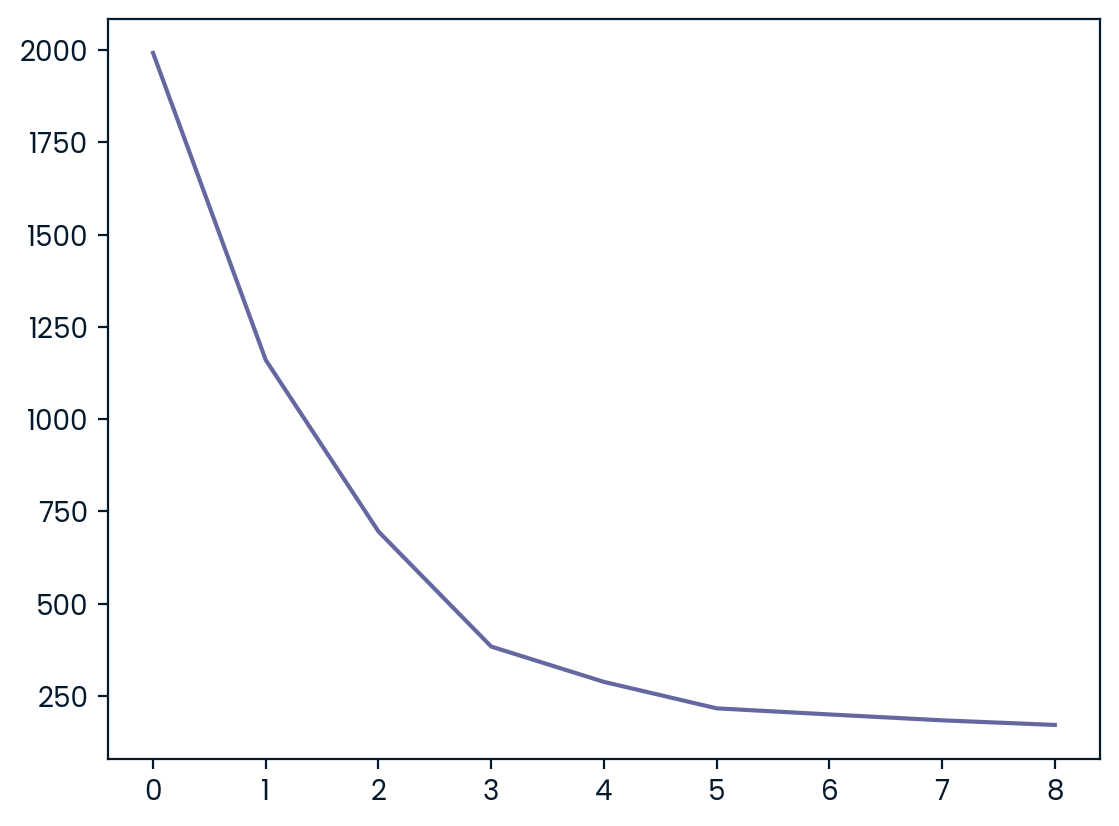

In [5]:
# Observação da medida de inercia para confirmar o numero de agrupamentos 

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters = n, random_state= 42)
    kmeans.fit(penguins_stdzed)
    
    inertia.append(kmeans.inertia_)
    
plt.plot(inertia)
plt.show()

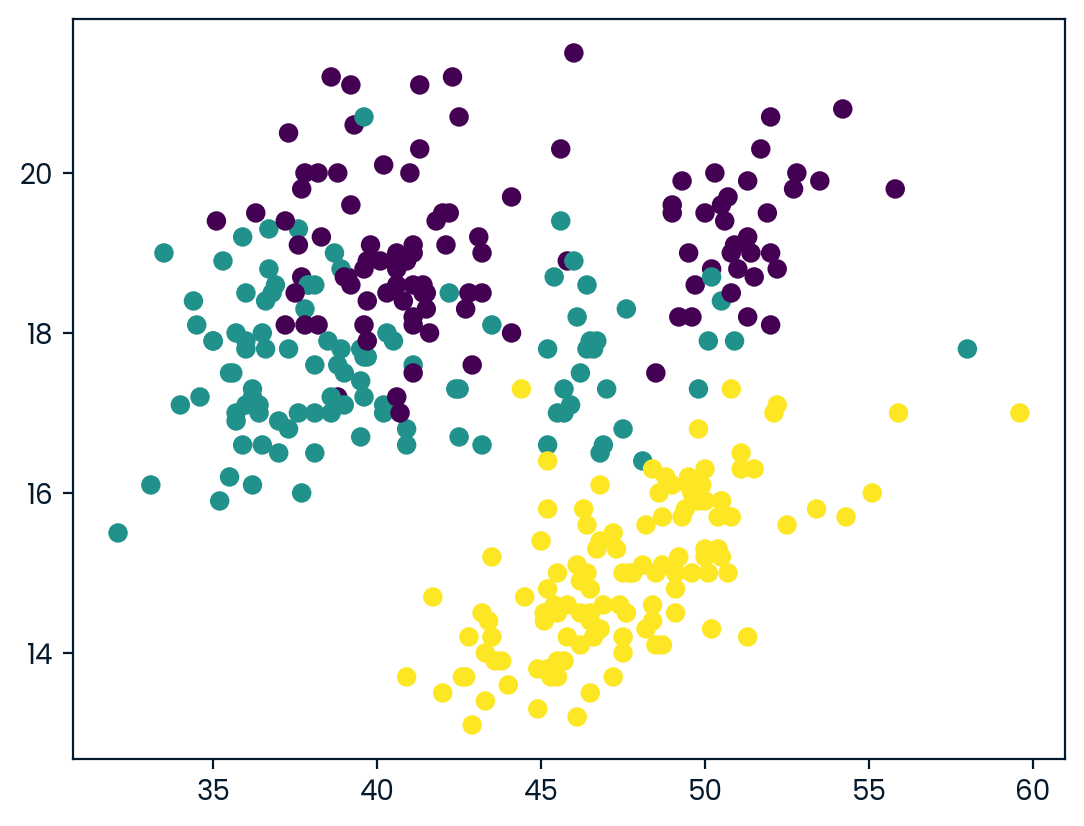

In [6]:
# Modelo instanciado almejando 3 agrupamentos para as 3 especies de penguins
kmeans = KMeans(n_clusters= 3, random_state= 69)

# "Encaixe" dos dados no modelo
kmeans.fit(penguins_stdzed)

# Seperando instancias agrupadas para vizualização
labels = kmeans.labels_
xs = penguins_df[["culmen_length_mm"]]
ys = penguins_df[["culmen_depth_mm"]]

# Desenho da classificação pela largura e profundidade do culmen
plt.scatter(xs, ys, c= labels)
plt.show()

In [7]:
# Obtendo valores dos agrupamentos e colunas de interesse
penguins_df["label"] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g']

# Criação de uma tabela com as caracteriscicas médias de cada espécie prevista
stat_penguins = penguins_df.groupby("label")[numeric_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,47.568067,14.996639,217.235294,5092.436975
